In [139]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [140]:
from fastai.conv_learner import *

In [141]:
PATH = "D:/FAST.Ai/Idea/OCR/"

In [142]:
os.listdir(PATH)

['data', 'models', 'ocr.csv', 'ocr.xlsx', 'tmp']

In [143]:
from fastai.plots import *

In [144]:
from planet import *

In [145]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [146]:
metrics=[f2]
f_model = resnet34

In [147]:
label_csv = f'{PATH}ocr.csv'

In [148]:
n = len(list(open(label_csv))) - 1

In [149]:
n

5

In [150]:
val_idxs = get_cv_idxs(n)

In [151]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    # transforms_top_down means full set of possible transformasions  
    return ImageClassifierData.from_csv(PATH, 'data', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs)#, test_name='test-jpg')

In [152]:
sz = 40
data = get_data(sz)

In [180]:
fn = PATH + data.trn_ds.fnames[0]

In [181]:
fn

'D:/FAST.Ai/Idea/OCR/data\\20cce081f833c47cc58ca579f9bc1cd7eb8189a7.jpg'

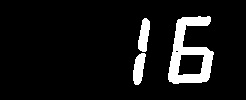

In [182]:
img = PIL.Image.open(fn); img

In [183]:
img.size

(246, 100)

In [175]:
it = iter(data.val_dl)

In [176]:
x,y = next(it)

In [177]:
y


 0  1  0  0  0
[torch.FloatTensor of size 1x5]

In [178]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


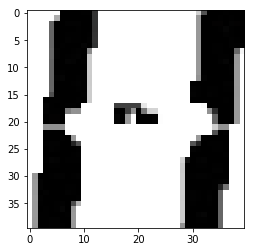

In [179]:
plt.imshow(data.val_ds.denorm(to_np(x))[0] * 1.4)

In [184]:
list(zip(y[0],data.classes))

[(0.0, ''), (1.0, '0'), (0.0, '1'), (0.0, '10'), (0.0, '6')]

In [96]:
learn = ConvLearner.pretrained(f_model,data,metrics = metrics)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.714155   0.767002   0.555556  



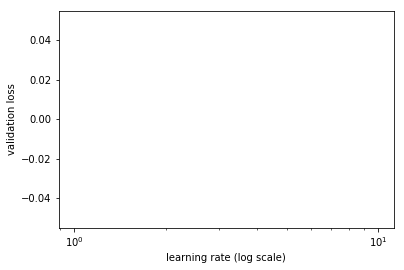

In [97]:
lrf = learn.lr_find()
learn.sched.plot()

In [98]:
lr = 0.2

In [99]:
learn.fit(lr,3,cycle_len = 1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.979422   0.742429   0.555556  
    1      0.892775   0.734385   0.555556                                                                              
    2      0.794796   0.455336   0.625                                                                                 
    3      0.745244   0.476076   0.555556                                                                              
    4      0.721367   0.185629   1.0                                                                                   
    5      0.663115   0.201498   0.714286                                                                              
    6      0.597608   0.112555   1.0                                                                                   



[array([0.11255]), 1.0]